Round Robin Scheduling Algorithm (PREEMPTIVE)

Round Robin Algorithm (PREEMPTIVE)

1. Process Order: P1,P2,P3,P1,P1,P1,P1,P1
2. Total Completion Time: 0,4,7,10,14,18,22,26,30
3. Start time: 0,4,7,10,14,18,22,26
4. Completion time: 4,7,10,14,18,22,26,30
5. Processes with exit time: ('P1', 4),('P2', 7),('P3', 10),('P1', 14),('P1', 18),('P1', 22),('P1', 26),('P1', 30)


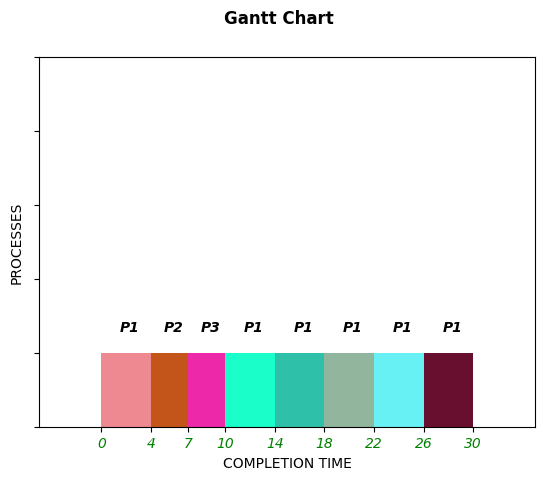

In [1]:
import matplotlib.pyplot as plt
from matplotlib.axis import Axis
import random

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
    

class RoundRobin:

    def processData(self,temp):
        process_data = []
        
        #read file line by line to get input of algorithm
        filedata = []
        filepath = 'roundrobin_preemptive.txt'
        with open(filepath) as fp:
            line = fp.readline()
            cnt = 1
            while line:
                filedata_lines = line.strip().split(":")
                filedata.append(filedata_lines[1].split(","))
                line = fp.readline()
                cnt += 1

        # Process id's
        process_id = [int(s) for s in filedata[0]]
        no_of_processes = len(process_id)

        # Burst time of all processes
        burst_time = [int(s) for s in filedata[1]]
        
        # Arrival time of all processes
        arrival_time = [int(s) for s in filedata[2]]
        
        # Time quantum
        quantum_array = [int(s) for s in filedata[3]]
        time_slice = quantum_array[0]
        
        i = 0
        for i in range(no_of_processes):
            temporary = []
            temporary.extend([process_id[i], arrival_time[i], burst_time[i], 0, burst_time[i]])
            '''
            '0' is the state of the process. 0 means not executed and 1 means execution complete

            '''
            process_data.append(temporary)
        RoundRobin.schedulingProcess(self, process_data, time_slice)
    
    def schedulingProcess(self, process_data, time_slice):
        start_time = []
        exit_time = []
        executed_process = []
        ready_queue = []
        s_time = 0
        process_data.sort(key=lambda x: x[1])
        '''
        Sort processes according to the Arrival Time
        '''
        while 1:
            normal_queue = []
            temp = []
            for i in range(len(process_data)):
                if process_data[i][1] <= s_time and process_data[i][3] == 0:
                    present = 0
                    if len(ready_queue) != 0:
                        for k in range(len(ready_queue)):
                            if process_data[i][0] == ready_queue[k][0]:
                                present = 1
                    '''
                    The above if loop checks that the next process is not a part of ready_queue
                    '''
                    if present == 0:
                        temp.extend([process_data[i][0], process_data[i][1], process_data[i][2], process_data[i][4]])
                        ready_queue.append(temp)
                        temp = []
                    '''
                    The above if loop adds a process to the ready_queue only if it is not already present in it
                    '''
                    if len(ready_queue) != 0 and len(executed_process) != 0:
                        for k in range(len(ready_queue)):
                            if ready_queue[k][0] == executed_process[len(executed_process) - 1]:
                                ready_queue.insert((len(ready_queue) - 1), ready_queue.pop(k))
                    '''
                    The above if loop makes sure that the recently executed process is appended at the end of ready_queue
                    '''
                elif process_data[i][3] == 0:
                    temp.extend([process_data[i][0], process_data[i][1], process_data[i][2], process_data[i][4]])
                    normal_queue.append(temp)
                    temp = []
            if len(ready_queue) == 0 and len(normal_queue) == 0:
                break
            if len(ready_queue) != 0:
                if ready_queue[0][2] > time_slice:
                    '''
                    If process has remaining burst time greater than the time slice, it will execute for a time period equal to time slice and then switch
                    '''
                    start_time.append(s_time)
                    s_time = s_time + time_slice
                    e_time = s_time
                    exit_time.append(e_time)
                    executed_process.append(ready_queue[0][0])
                    for j in range(len(process_data)):
                        if process_data[j][0] == ready_queue[0][0]:
                            break
                    process_data[j][2] = process_data[j][2] - time_slice
                    ready_queue.pop(0)
                elif ready_queue[0][2] <= time_slice:
                    '''
                    If a process has a remaining burst time less than or equal to time slice, it will complete its execution
                    '''
                    start_time.append(s_time)
                    s_time = s_time + ready_queue[0][2]
                    e_time = s_time
                    exit_time.append(e_time)
                    executed_process.append(ready_queue[0][0])
                    for j in range(len(process_data)):
                        if process_data[j][0] == ready_queue[0][0]:
                            break
                    process_data[j][2] = 0
                    process_data[j][3] = 1
                    process_data[j].append(e_time)
                    ready_queue.pop(0)
            elif len(ready_queue) == 0:
                if s_time < normal_queue[0][1]:
                    s_time = normal_queue[0][1]
                if normal_queue[0][2] > time_slice:
                    '''
                    If process has remaining burst time greater than the time slice, it will execute for a time period equal to time slice and then switch
                    '''
                    start_time.append(s_time)
                    s_time = s_time + time_slice
                    e_time = s_time
                    exit_time.append(e_time)
                    executed_process.append(normal_queue[0][0])
                    for j in range(len(process_data)):
                        if process_data[j][0] == normal_queue[0][0]:
                            break
                    process_data[j][2] = process_data[j][2] - time_slice
                elif normal_queue[0][2] <= time_slice:
                    '''
                    If a process has a remaining burst time less than or equal to time slice, it will complete its execution
                    '''
                    start_time.append(s_time)
                    s_time = s_time + normal_queue[0][2]
                    e_time = s_time
                    exit_time.append(e_time)
                    executed_process.append(normal_queue[0][0])
                    for j in range(len(process_data)):
                        if process_data[j][0] == normal_queue[0][0]:
                            break
                    process_data[j][2] = 0
                    process_data[j][3] = 1
                    process_data[j].append(e_time)
        t_time = RoundRobin.calculateTurnaroundTime(self, process_data)
        #w_time = RoundRobin.calculateWaitingTime(self, process_data)
        w_time = 0
        RoundRobin.printData(self, process_data, t_time, w_time, executed_process,start_time,exit_time)
        
    def calculateTurnaroundTime(self, process_data):
        total_turnaround_time = 0
        for i in range(len(process_data)):
            turnaround_time = process_data[i][5] - process_data[i][1]
            '''
            turnaround_time = completion_time - arrival_time
            '''
            total_turnaround_time = total_turnaround_time + turnaround_time
            process_data[i].append(turnaround_time)
        average_turnaround_time = total_turnaround_time / len(process_data)
        '''
        average_turnaround_time = total_turnaround_time / no_of_processes
        '''
        return average_turnaround_time
    
    def printData(self, process_data, average_turnaround_time, average_waiting_time, executed_process,start_time,exit_time):
        process_data.sort(key=lambda x: x[0])
        '''
        Sort processes according to the Process ID
        '''
        #ganttchart
        rr_gantt  = RoundRobin.drawGantt(executed_process,start_time,exit_time)
        
    def drawGantt(executed_process,start_time,exit_time):
        # Declaring a figure "gnt", # Setting Y-axis limits, X-axis limits, # Setting labels for x-axis and y-axis
        totaltime = []
        fig, gnt = plt.subplots()
        ax = plt.gca()

        plt.ylabel("Processes")
        plt.xlabel("X Label")
        
        totaltime = start_time.copy()
        totaltime.append(exit_time[-1])
    
        gnt.set_xlim(-5, exit_time[-1]+5)
        gnt.set_ylim(0, 5)

        gnt.set_xlabel('COMPLETION TIME')
        gnt.set_ylabel('PROCESSES')

        ax.axes.yaxis.set_ticklabels([])
        ax.set_xticks(totaltime)
        ax.set_xticklabels(labels = totaltime, fontstyle='italic', color='green')

        # Setting graph attribute
        #gnt.grid(True)
        #plt.box(False)
        no_of_colors=len(executed_process)
        colors=["#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)])for j in range(no_of_colors)]
        
        processorder = []
        for i in executed_process:
            processorder.append("P"+str(i))
        merge = list(zip((processorder), (exit_time)))
        
        # Declaring a bar in schedule
        i = 0
        while i < len(executed_process):
            ax.text((start_time[i]+(exit_time[i]-start_time[i])/2)-0.5, 1.3, processorder[i], style='italic',weight='bold')
            gnt.broken_barh([(start_time[i], exit_time[i]-start_time[i])], (0, 1), facecolors =(colors[i]),)
            i += 1
        
        print(color.BOLD+color.UNDERLINE+"Round Robin Algorithm (PREEMPTIVE)\n"+color.END)
        print("1. Process Order: "+ str(",".join(str(item) for item in processorder)))
        print("2. Total Completion Time: "+ str(",".join(str(item) for item in totaltime)))
        print("3. Start time: "+ str(",".join(str(item) for item in start_time)) )
        print("4. Completion time: "+ str(",".join(str(item) for item in exit_time)) )
        print ("5. Processes with exit time: " +  str(",".join(str(item) for item in merge)))
        fig.suptitle('Gantt Chart\n', fontweight ="bold")

        return(plt.savefig("rrgantt.png"))

if __name__ == "__main__":
    temp = 0
    rr = RoundRobin()
    rr.processData(temp)